In [2]:
import pickle
with open('../Ptt_Insurance/pttcrawl_Nan.pkl', 'rb') as f:
    dataptt = pickle.load(f) #dataptt為一個a list of dictionary

import pandas as pd
show = pd.DataFrame(dataptt)
show.head()

,author,title,url
0,basloilu,[意外/醫療] 32歲女 新保單檢視/南山,/bbs/Insurance/M.1556985859.A.07F.html
1,zack2808,[心得] 三商人壽 南山人壽 理賠超快速,/bbs/Insurance/M.1556867843.A.A05.html
2,WHungYun,[險種] 南山乙式車險請教,/bbs/Insurance/M.1556842393.A.5FC.html
3,libby2,[險種] 57歲女 新保單規劃/南山,/bbs/Insurance/M.1556678712.A.551.html
4,linalain15,[險種] 31歲女 既有保單檢視/南山,/bbs/Insurance/M.1556269857.A.219.html


In [3]:
print(dataptt[0]['url'])
url1 = dataptt[0]['url']
print(dataptt[0]['title'].split()[0])
title = dataptt[0]['title'].split()[0]

/bbs/Insurance/M.1556985859.A.07F.html
[意外/醫療]


In [4]:
#try to crawl content
import requests
from bs4 import BeautifulSoup

url = 'https://www.ptt.cc'+ url1
res = requests.get(url).text
data = BeautifulSoup(res, 'html.parser')

#print((data.find(id = "main-content").text))
#print((data.find(id = "main-content").text))
#print(((data.find(id="main-content").find_all(class_="push")[1].find(class_="f1 hl push-tag")).text))
print((data.find(id = "main-content").find_all(class_="article-metaline")[1].find(class_="article-meta-value")).text)
title = data.find(id = "main-content").find_all(class_="article-metaline")[1].find(class_="article-meta-value").text
condition = title.split()
print(condition[0])

datatext = data.find(id = "main-content").text

[險種] 意外險/醫療險  32女 南山新保單檢視
[險種]


In [35]:
datatext.split()

['作者basloilu',
 '(阿鼎)看板Insurance標題[險種]',
 '意外險/醫療險',
 '32女',
 '南山新保單檢視時間Sun',
 'May',
 '5',
 '00:04:17',
 '2019',
 '一、性別：',
 '女',
 '二、年齡：32',
 '三、職業/工作內容：',
 '四、保障需求：意外>醫療>癌症',
 '五、保費預算：20000/年',
 '六、健康告知：',
 '（下列事項亦會於要保書詢問，參考作答即可，如認為自有體況涉及隱私，可不填）',
 '（按保險法第64條，隱匿/不實告知，可能會被保險公司解約：http://0rz.tw/8IOpS）',
 '(1)',
 '最近２個月內是否曾因受傷或生病接受醫師治療、診療或用藥？no',
 '(2)',
 '過去２年內是否曾因接受健康檢查有異常情形而被建議接受其他檢查或治療？no',
 '(3)',
 '過去５年內是否曾因受傷或生病住院治療７日以上？no',
 '(4)',
 '是否已確知懷孕？如是，已經幾週？計畫懷孕中',
 '(4)',
 '是否已確知懷孕？如是，已經幾週？（女性回答）',
 '(5)',
 '過去５年內是否曾因患有下列疾病而接受醫師治療、診療或用藥？',
 'no',
 '(心血管疾病/腦血管疾病/肺部疾病/肝臟疾病/腎臟疾病/甲狀腺疾病/精神疾病)',
 '(6)',
 '過去１年內是否曾因患有下列疾病，而接受醫師治療、診療或用藥？no',
 '(胃部疾病/肝臟疾病/呼吸器官疾病/眼疾/婦女病)',
 '(7)',
 '目前身體機能是否有失明、聾啞及言語、咀嚼、四肢機能障害？no',
 '(8)（成人）BMI',
 '是否不在下列範圍：BMI＝16.5～28',
 'no',
 '（兒童）生長曲線百分位',
 '是否不在下列範圍：3%以上',
 '七、常用交通工具：',
 '機車',
 '八、預計規劃：意外',
 '醫療',
 '癌症',
 '九、現有保險：',
 '無',
 '十、預增保險：',
 '保險公司：南山',
 '(人情...)',
 '商品名稱',
 '[英文代號]',
 '保額/計畫',
 '期間',
 '保費',
 '________________________________________________________

In [11]:
#將[險種]文章存為pickle
INScontent = []
for data in dataptt:
    url1 = data['url']
    url2 = 'https://www.ptt.cc'+ str(url1)
    title = data['title'].split()[0]
    if title == '[險種]':
        res2 = requests.get(url2).text
        data2 = BeautifulSoup(res2, 'html.parser')    
        try:
            datatext2 = data2.find(id = "main-content").text
        except:
            datatext2 = 'NotFound'
        INScontent.append(datatext2)
    else:
        pass

In [12]:
#寫入pickle
import pickle

with open('../Ptt_Insurance/pttcrawl_INScontent.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(INScontent, f)
print(len(INScontent))

676


In [5]:
import jieba
import jieba.posseg
jieba.load_userdict('userdict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Hans\AppData\Local\Temp\jieba.cache
Loading model cost 0.863 seconds.
Prefix dict has been built succesfully.


In [6]:
import unicodedata
from collections import Counter

with open('stopwords.txt','r', encoding='UTF-8') as stop:
    text = stop.read()
stopword = text.split("\n")

with open('../Ptt_Insurance/pttcrawl_INScontent.pkl', 'rb') as f:
    alldata = pickle.load(f) #alldata為一個a list of dictionary
sumlist = []
allcounter = Counter()
for i in alldata:
    sentences = i.split()
    word_counts = Counter()
    for sentence in sentences:
        for word in jieba.cut(sentence):
            if word in stopword:
                continue
            if len(word) > 1 or not unicodedata.category(word).startswith('P'):
                word_counts[word] += 1
    word1 = word_counts
    allcounter = allcounter + word1
alldata = dict(allcounter.most_common())
print(allcounter.most_common(250))

[('年', 4282), ('萬', 3095), ('疾病', 3054), ('醫療', 2976), ('保費', 2839), ('南山', 2647), ('意外', 2555), ('附約', 2500), ('元', 2257), ('終身', 2235), ('健康', 2208), ('南山人壽', 2025), ('規劃', 1929), ('保單', 1796), ('保障', 1670), ('公司', 1602), ('推', 1570), ('計畫', 1501), ('險種', 1484), ('保額', 1434), ('手術', 1427), ('beriaura', 1400), ('住院', 1377), ('建議', 1376), ('請', 1323), ('cc', 1313), ('ptt', 1308), ('傷害', 1308), ('歲', 1258), ('接受', 1239), ('治療', 1236), ('實支', 1204), ('時間', 1200), ('曾', 1196), ('買', 1195), ('Insurance', 1185), ('險', 1177), ('預算', 1133), ('告知', 996), ('商品名稱', 982), ('代號', 974), ('期間', 970), ('英文', 963), ('過去', 949), ('癌症', 923), ('內容', 911), ('好', 908), ('定期', 901), ('需求', 898), ('無', 867), ('萬元', 865), ('給付', 851), ('目前', 837), ('重大', 837), ('000', 807), ('說', 804), ('站', 802), ('Seilon', 793), ('發信', 783), ('批踢踢', 783), ('實業坊', 783), ('工作', 775), ('想', 767), ('壽險', 733), ('條款', 717), ('用藥', 716), ('醫師', 711), ('診療', 709), ('HS', 709), ('職業', 691), ('購買', 688), ('後', 681), ('看板', 675), ('

In [7]:
alldata2 = dict(allcounter.most_common(20))

In [8]:
with open('../Ptt_Insurance/pttcrawl_INScontent.pkl', 'rb') as f:
    alldata3 = pickle.load(f) #alldata為一個a list of dictionary

vectorlist = []
token = [] #所有文章斷完詞的結果
for i in alldata3:
    sentences = i.split()
    word_counts = Counter()
    space =''
    tokenmid = []
    for sentence in sentences:
        space2 = ''
        tokensmall = []
        for word in jieba.cut(sentence): 
            if word in stopword:
                continue
            if len(word) > 1 or not unicodedata.category(word).startswith('P'):
                space2 = space2 + ' ' + word
                tokensmall.append(word)
        space = space + ' ' + space2
        tokenmid.extend(tokensmall)
    vectorlist.append(space)
    token.append(tokenmid)

In [9]:
print(token[78])

['作者', 'shadow0350', 'Shadow', '看板', 'Insurance', '標題', '險種', '歲', '男', '現有', '保單', '檢視', '南山', '時間', 'Mon', 'Feb', '性別', '男', '年齡', '歲', '職業', '工作', '內容', '科技', '業', '工程', '師', '保障', '需求', '既有', '保單', '檢視', '保費', '預算', '年繳', '萬內', '健康', '告知', '事項', '亦', '保書', '詢問', '參考', '作答', '即可', '如認', '自有', '體況', '涉及', '隱私', '可不填', '保險法', '條', '隱匿', '不實', '告知', '公司', '解約', 'http', '0rz', 'tw', '8IOpS', '最近', '月', '曾', '受傷', '生病', '接受', '醫師', '治療', '診療', '用藥', '否', '過去', '年', '曾', '接受', '健康', '檢查', '異常', '情形', '建議', '接受', '檢查', '治療', '否', '過去', '年', '曾', '受傷', '生病', '住院', '治療', '日', '以上', '否', '已確', '知懷孕', '如是', '已經', '幾週', '女性', '回答', '過去', '年', '曾', '患有', '疾病', '接受', '醫師', '治療', '診療', '用藥', '否', '過去', '年', '曾', '患有', '疾病', '接受', '醫師', '治療', '診療', '用藥', '否', '過去', '年', '曾', '患有', '疾病', '接受', '醫師', '治療', '診療', '用藥', '否', '心血管', '疾病', '腦', '血管', '疾病', '肺部', '疾病', '肝臟', '疾病', '腎臟', '疾病', '甲狀腺', '疾病', '精神疾病', '過去', '年', '曾', '患有', '疾病', '接受', '醫師', '治療', '診療', '用藥', '否', '胃部', '疾病', '肝臟', '疾病', '呼吸器官'

In [10]:
print(vectorlist[78])

  作者 shadow0350  Shadow 看板 Insurance 標題 險種  歲 男  現有 保單 檢視 南山 時間 Mon  Feb     性別 男  年齡 歲  職業 工作 內容 科技 業 工程 師  保障 需求 既有 保單 檢視  保費 預算 年繳 萬內  健康 告知  事項 亦 保書 詢問 參考 作答 即可 如認 自有 體況 涉及 隱私 可不填  保險法 條 隱匿 不實 告知 公司 解約 http 0rz tw 8IOpS   最近 月 曾 受傷 生病 接受 醫師 治療 診療 用藥  否   過去 年 曾 接受 健康 檢查 異常 情形 建議 接受 檢查 治療 否   過去 年 曾 受傷 生病 住院 治療 日 以上 否   已確 知懷孕 如是 已經 幾週 女性 回答   過去 年 曾 患有 疾病 接受 醫師 治療 診療 用藥 否   過去 年 曾 患有 疾病 接受 醫師 治療 診療 用藥 否   過去 年 曾 患有 疾病 接受 醫師 治療 診療 用藥 否  心血管 疾病 腦 血管 疾病 肺部 疾病 肝臟 疾病 腎臟 疾病 甲狀腺 疾病 精神疾病   過去 年 曾 患有 疾病 接受 醫師 治療 診療 用藥 否  胃部 疾病 肝臟 疾病 呼吸器官 疾病 眼疾 婦女病   目前 身體 機能 失明 聾啞 及言語 咀嚼 四肢 機能 障害 否  成人 BMI  範圍 BMI ＝ 16.5  兒童 生長 曲線 百分位  範圍 3% 以上  否  常用 交通工具 汽車  預計 規劃 癌症 重大 傷病 意外 傷殘無法 工作 保障  現有  公司 南山人壽  購買 時間 民國 年 月  商品名稱  英文 代號  保額 計畫  期間  保費   南山 康福 二十年 期繳 費終 身壽險  20PLG  000 000  年   南山人壽住院醫療保險附約 人  HSE10G    南山人壽新人身意外傷害保險附約  PARA1Q  025   南山人壽 傷害 醫療 保險金 附加 條款  MN1N  392.14   南山人壽 手術 醫療 附約 人  SIRE  000   南山人壽 意外 骨折 特定 手術  PBBRAR  057   傷害 保險金 附約  南山 癌症 醫療 終身 附約  20CR    商品名稱  英文 代號  保額 計畫  期間  保費   南山 新康祥終

Test model

In [11]:
import logging
from gensim.models import word2vec
model = word2vec.Word2Vec.load('word2vec.model') #利用維基百科訓練出來的model

C:\Users\Hans\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [12]:
model.wv['人生']

array([ 1.50687665e-01, -2.03477591e-02, -1.18784976e+00, -1.45708799e-01,
       -1.65885353e+00,  2.31646323e+00,  9.76253629e-01,  1.18711960e+00,
       -1.23019886e+00,  1.14449799e+00,  2.69054246e+00,  2.40499091e+00,
       -1.47560096e+00, -1.79927468e-01, -1.04150760e+00,  1.66812849e+00,
       -9.94893312e-01, -1.61816204e+00, -2.01147228e-01,  1.79437697e+00,
       -9.93075192e-01, -4.23616737e-01, -1.52703911e-01,  2.32789111e+00,
       -1.36147499e+00, -5.40265702e-02, -1.29287279e+00,  1.28474283e+00,
       -3.01516682e-01, -1.85314262e+00,  3.96333599e+00, -9.27809477e-01,
       -5.84439561e-02,  1.15156603e+00, -3.74570370e-01, -1.47656369e+00,
        2.71659613e-01,  4.88205254e-01,  7.12614298e-01, -2.12412626e-01,
        1.18317258e+00,  1.26613998e+00, -7.88230240e-01, -1.21736795e-01,
        3.54880318e-02, -4.36862320e-01,  8.07998478e-02,  1.33954132e+00,
        1.41270733e+00, -1.16124153e+00, -6.23494275e-02,  5.84600866e-01,
        6.05789661e-01, -

In [12]:
model2 = word2vec.Word2Vec(token, min_count=5, size=300, sg=1, hs=1, negative=5, iter=30,window = 5) #利用token訓練出來的Model2

挑選與南山企業形象有關的字詞 進行觀察

In [15]:
print("Number of words: %d" % len(model2.wv.vocab))
print(model2.most_similar_cosmul("南山人壽"))
print(model2.most_similar("南山"))
print(model2.most_similar("業務員"))
print(model2.most_similar("理賠"))
print(model2.most_similar("業務"))
print(model2.most_similar("人情"))

Number of words: 3788
[('南山人壽住院醫療保險附約', 0.7761752605438232), ('不分紅', 0.7483094930648804), ('南山人壽新人身意外傷害保險附約', 0.7447584271430969), ('新福氣', 0.7429969310760498), ('護您', 0.7415198087692261), ('20DDC', 0.7362422943115234), ('HSER', 0.7322932481765747), ('南山人壽傷害保險附約', 0.728807806968689), ('康祥', 0.7276370525360107), ('南山人壽新終身醫療保險', 0.7256417274475098)]
[('時間', 0.41051581501960754), ('險種', 0.39381590485572815), ('新舊', 0.3869097828865051), ('保單', 0.3705367147922516), ('健檢時間', 0.3464547097682953), ('南山人壽', 0.3461769223213196), ('國泰', 0.3426945209503174), ('富邦', 0.3421388268470764), ('三商', 0.33771905303001404), ('男保單', 0.33619678020477295)]
[('朋友', 0.30652904510498047), ('主動', 0.2978905439376831), ('只想', 0.2891767621040344), ('同學', 0.28243303298950195), ('大便', 0.27564990520477295), ('一樓', 0.2647099494934082), ('傭金', 0.2604239583015442), ('認識', 0.2542494833469391), ('保險業', 0.2535591125488281), ('xninjax', 0.25289177894592285)]
[('融通', 0.37855440378189087), ('糾紛', 0.3632134199142456), ('自負額', 0.35

C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  
C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hans\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
C:

C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  """Entry point for launching an IPython kernel.


list

In [17]:
alldata2 = dict(allcounter.most_common(20))
print(alldata2.keys())

dict_keys(['年', '萬', '疾病', '醫療', '保費', '南山', '意外', '附約', '元', '終身', '健康', '南山人壽', '規劃', '保單', '保障', '公司', '推', '計畫', '險種', '保額'])


In [18]:
#利用PCA降維
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

words = list(alldata2.keys())
X = [] #8x100的matrix
for word in words:
    try:
        X.append(model2[word])
    except KeyError:
        continue
pca.fit(X)

C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

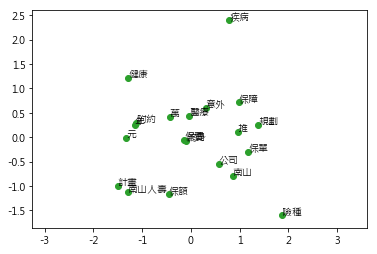

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from collections import Counter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

points = pca.transform(X)
for i in range(len(points)):
    label = words[i]
    x = points[i][0]
    y = points[i][1]
    plt.scatter(x, y,color='C2')
    plt.annotate(label, xy=(x, y))
plt.axis('equal');

In [39]:
indexes = model2.wv.most_similar_cosmul(u'南山') #list of tuple
for index in indexes: 
    print (index[0])

print('---------------')    
indexes2 = model2.wv.most_similar(u'南山')
for index in indexes2:
    print (index[0])

南山人壽
新舊
保單
美邦
國泰
時間
富邦
健檢時間
Thu
Jun
---------------
南山人壽
新舊
保單
美邦
國泰
時間
富邦
健檢時間
Thu
Jun


C:\Users\Hans\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Dream Big , Draw Big

In [21]:
print(type(model2.wv.most_similar_cosmul(u'南山')[0][0]))

<class 'str'>


In [26]:
#indexes = model2.wv.most_similar_cosmul(u'南山') #list of tuple
#for index in indexes: 
#    print (index[0])
    
wordlist = ['南山', '南山人壽', '理賠', '業務','人情','保險業']
biglist = []
for i in wordlist:
    indexes = model2.wv.most_similar_cosmul(i)
    templist = []
    for index in indexes:
        templist.append(index[0])
    biglist.append(templist)
for i in (biglist):
    print(i)

['時間', '險種', '新舊', '保單', '健檢時間', '南山人壽', '國泰', '富邦', '三商', '男保單']
['南山人壽住院醫療保險附約', '不分紅', '南山人壽新人身意外傷害保險附約', '新福氣', '護您', '20DDC', 'HSER', '南山人壽傷害保險附約', '康祥', '南山人壽新終身醫療保險']
['融通', '糾紛', '自負額', '爭議', '嚴格', '速度', '要件', '刁難', '項', '申請']
['開給', '業績', '傭金', '阿姨', '留言', '給業務', '嫌', '表示', '拒絕', '方便']
['壓力', '口袋', '基', '家保險', '權益', '悲劇', '一輩子', 'genius111', '無誤', 'B2']
['好友', '資格', '同學', '信任', '朋友', '傭金', '從事', '當業務', '薪資', '害怕']


In [23]:
#利用PCA降維
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

BigX = []
for l in biglist:
    words = l
    X2 = [] #8x100的matrix
    for word in words:
        try:
            X2.append(model2[word])
        except KeyError:
            continue
    pca.fit(X2)
    points2 = pca.transform(X2)
    BigX.append(points2)    

C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [24]:
print(type(BigX[0]))

<class 'numpy.ndarray'>


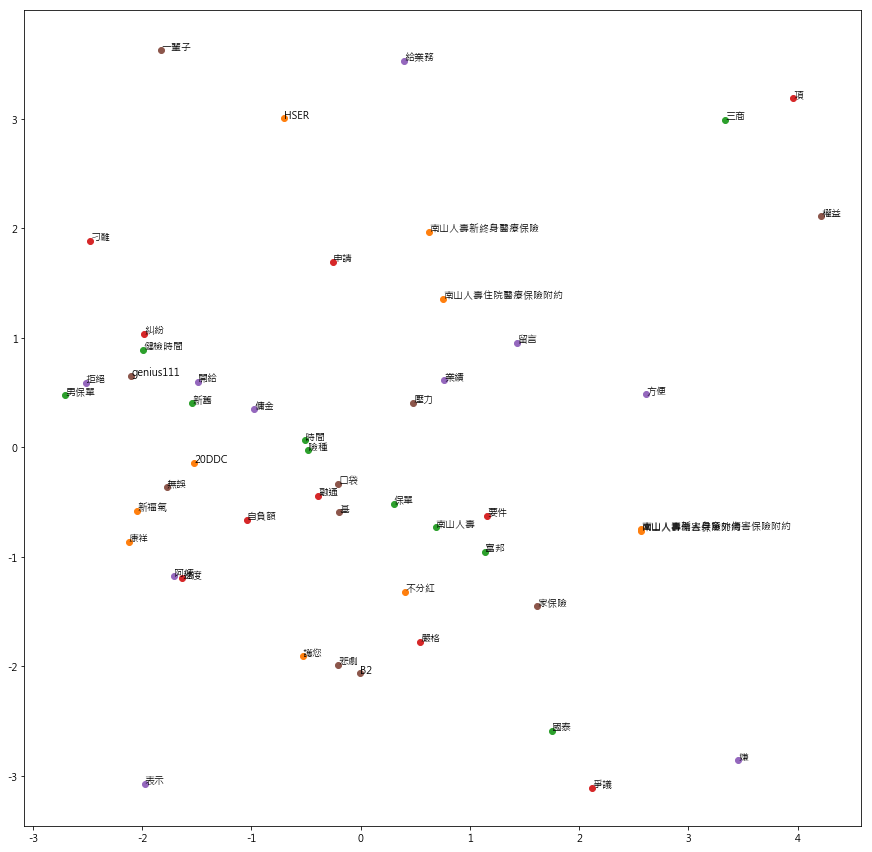

In [42]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from collections import Counter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 15))
for i in range(len(BigX[0])):
    label = biglist[0][i]
    label2 = biglist[1][i]  
    label3 = biglist[2][i]
    label4 = biglist[3][i]
    label5 = biglist[4][i]
    x = BigX[0][i][0]
    y = BigX[0][i][1]
    x2 = BigX[1][i][0]
    y2 = BigX[1][i][1]
    x3 = BigX[2][i][0]
    y3 = BigX[2][i][1]
    x4 = BigX[3][i][0]
    y4 = BigX[3][i][1]
    x5 = BigX[4][i][0]
    y5 = BigX[4][i][1]
    plt.scatter(x, y,color='C2')
    plt.annotate(label, xy=(x, y))
    plt.scatter(x2, y2,color='C1')
    plt.annotate(label2, xy=(x2, y2))
    plt.scatter(x3, y3,color='C3')
    plt.annotate(label3, xy=(x3, y3))
    plt.scatter(x4, y4,color='C4')
    plt.annotate(label4, xy=(x4, y4))
    plt.scatter(x5, y5,color='C5')
    plt.annotate(label5, xy=(x5, y5))
plt.axis('equal');
plt.savefig('fiveFEATURE.png')

In [58]:
print(type(points))

<class 'numpy.ndarray'>


 PCA 降維測試

C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


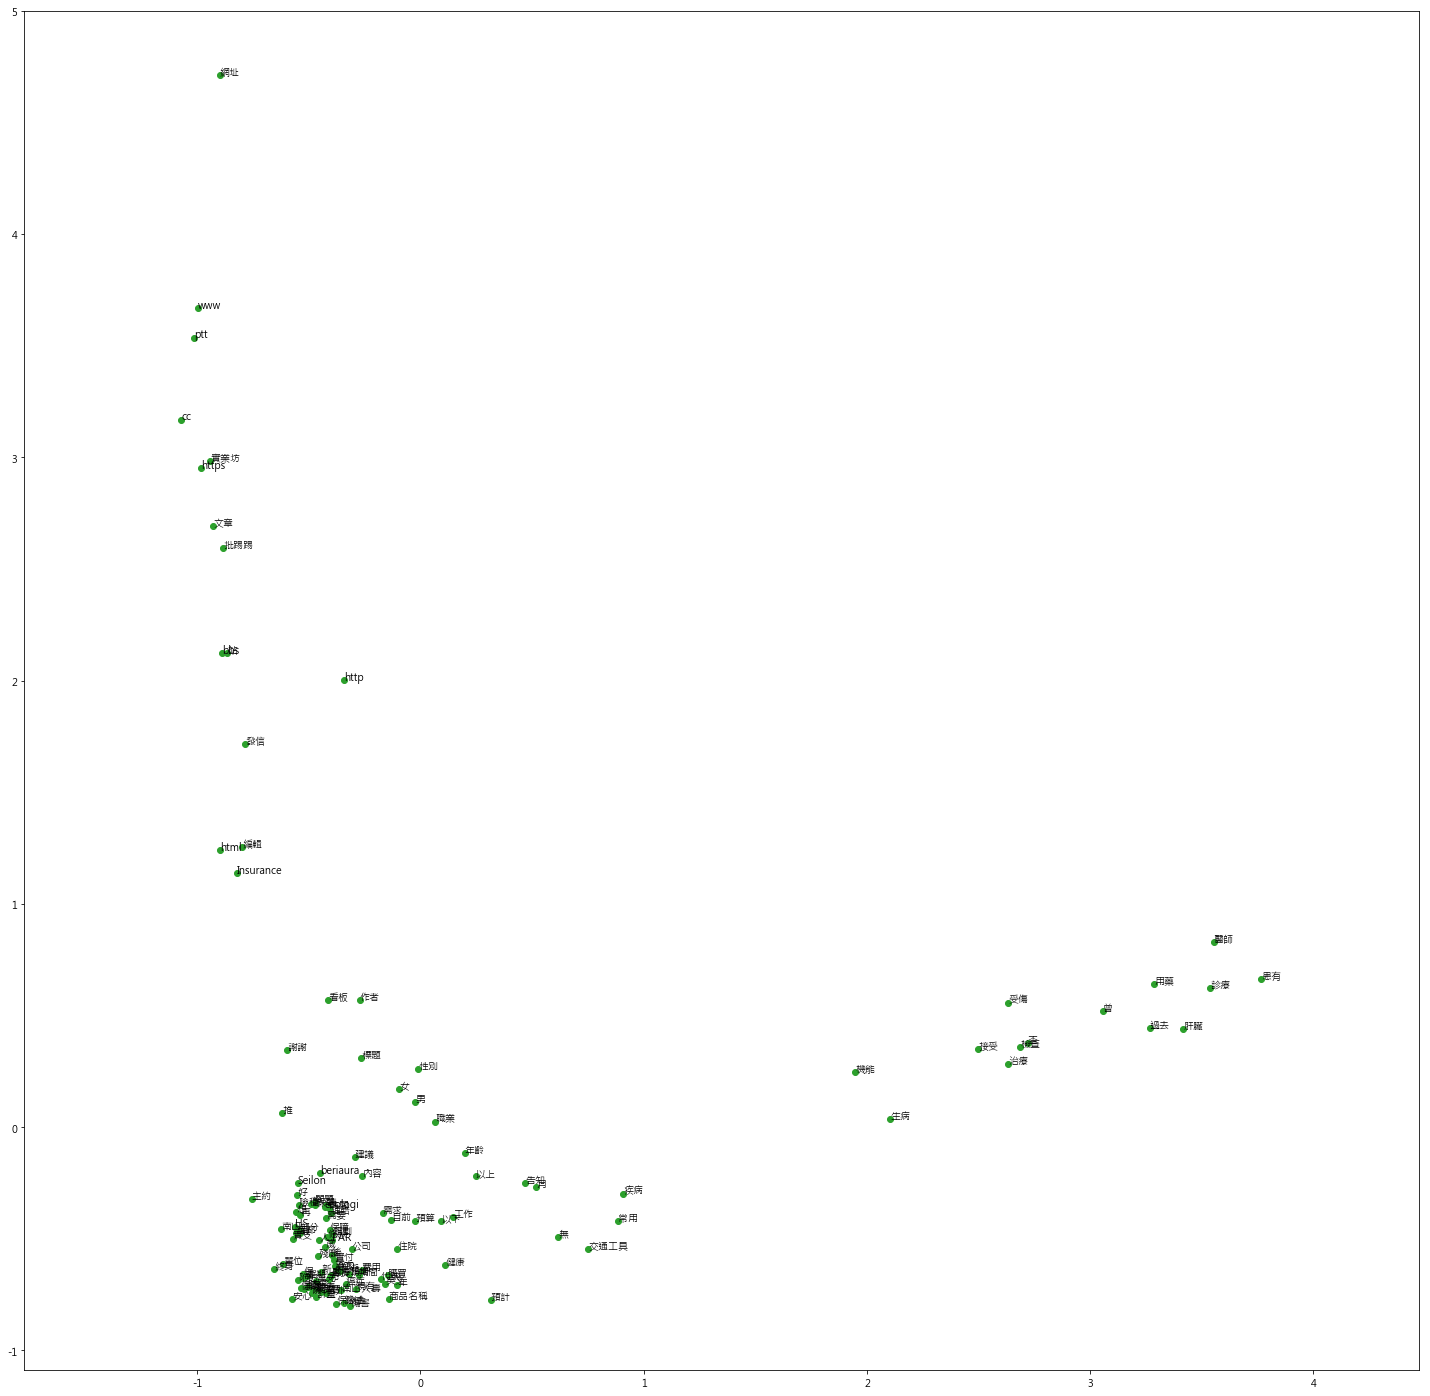

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
alldata3 = dict(allcounter.most_common(125))

X3 = [] #8x100的matrix
wordss = list(alldata3.keys())
for word in wordss:
    try:
        X3.append(model2[word])
    except KeyError:
        continue

points2 = pca.fit_transform(X3)
plt.figure(figsize=(25, 25))
for i in range(len(points2)):
    label6 = wordss[i]
    x6 = points2[i][0]
    y6 = points2[i][1]
    plt.scatter(x6, y6,color='C2')
    plt.annotate(label6, xy=(x6, y6))
plt.axis('equal');

TF-IDF

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 

print(type(vectorlist[0]))
#将文本中的词语转换为词频矩阵
vectorizer=CountVectorizer()#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
transformer= TfidfTransformer()
#计算个词语出现的次数
X = vectorizer.fit_transform(vectorlist)
tfidf=transformer.fit_transform(X)
#获取词袋中所有文本关键词
word = vectorizer.get_feature_names()
#print (word)
#查看词频结果
print (X.toarray())

<class 'str'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
features = X.toarray()
features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,20103,20104,20105,20106,20107,20108,20109,20110,20111,20112
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Apriori

In [42]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(token).transform(token)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
#graph.columns = mergeData['className']

TF-IDF 權重計算

In [32]:
import jieba
import jieba.posseg as pseg
import os
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
weight=tfidf.toarray()#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
TFlist = []
for i in range(len(weight)):#打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重
    print (u"-------这里输出第",i,u"类文本的词语tf-idf权重------")
    tempplist = []
    for j in range(len(word)):
            tempplist.append((word[j],weight[i][j]))
    TFlist.append(tempplist)
print(len(TFlist))

-------这里输出第 0 类文本的词语tf-idf权重------
-------这里输出第 1 类文本的词语tf-idf权重------
-------这里输出第 2 类文本的词语tf-idf权重------
-------这里输出第 3 类文本的词语tf-idf权重------
-------这里输出第 4 类文本的词语tf-idf权重------
-------这里输出第 5 类文本的词语tf-idf权重------
-------这里输出第 6 类文本的词语tf-idf权重------
-------这里输出第 7 类文本的词语tf-idf权重------
-------这里输出第 8 类文本的词语tf-idf权重------
-------这里输出第 9 类文本的词语tf-idf权重------
-------这里输出第 10 类文本的词语tf-idf权重------
-------这里输出第 11 类文本的词语tf-idf权重------
-------这里输出第 12 类文本的词语tf-idf权重------
-------这里输出第 13 类文本的词语tf-idf权重------
-------这里输出第 14 类文本的词语tf-idf权重------
-------这里输出第 15 类文本的词语tf-idf权重------
-------这里输出第 16 类文本的词语tf-idf权重------
-------这里输出第 17 类文本的词语tf-idf权重------
-------这里输出第 18 类文本的词语tf-idf权重------
-------这里输出第 19 类文本的词语tf-idf权重------
-------这里输出第 20 类文本的词语tf-idf权重------
-------这里输出第 21 类文本的词语tf-idf权重------
-------这里输出第 22 类文本的词语tf-idf权重------
-------这里输出第 23 类文本的词语tf-idf权重------
-------这里输出第 24 类文本的词语tf-idf权重------
-------这里输出第 25 类文本的词语tf-idf权重------
-------这里输出第 26 类文本的词语tf-idf权重------
-------这里输出

-------这里输出第 237 类文本的词语tf-idf权重------
-------这里输出第 238 类文本的词语tf-idf权重------
-------这里输出第 239 类文本的词语tf-idf权重------
-------这里输出第 240 类文本的词语tf-idf权重------
-------这里输出第 241 类文本的词语tf-idf权重------
-------这里输出第 242 类文本的词语tf-idf权重------
-------这里输出第 243 类文本的词语tf-idf权重------
-------这里输出第 244 类文本的词语tf-idf权重------
-------这里输出第 245 类文本的词语tf-idf权重------
-------这里输出第 246 类文本的词语tf-idf权重------
-------这里输出第 247 类文本的词语tf-idf权重------
-------这里输出第 248 类文本的词语tf-idf权重------
-------这里输出第 249 类文本的词语tf-idf权重------
-------这里输出第 250 类文本的词语tf-idf权重------
-------这里输出第 251 类文本的词语tf-idf权重------
-------这里输出第 252 类文本的词语tf-idf权重------
-------这里输出第 253 类文本的词语tf-idf权重------
-------这里输出第 254 类文本的词语tf-idf权重------
-------这里输出第 255 类文本的词语tf-idf权重------
-------这里输出第 256 类文本的词语tf-idf权重------
-------这里输出第 257 类文本的词语tf-idf权重------
-------这里输出第 258 类文本的词语tf-idf权重------
-------这里输出第 259 类文本的词语tf-idf权重------
-------这里输出第 260 类文本的词语tf-idf权重------
-------这里输出第 261 类文本的词语tf-idf权重------
-------这里输出第 262 类文本的词语tf-idf权重------
-------这里输出第

-------这里输出第 467 类文本的词语tf-idf权重------
-------这里输出第 468 类文本的词语tf-idf权重------
-------这里输出第 469 类文本的词语tf-idf权重------
-------这里输出第 470 类文本的词语tf-idf权重------
-------这里输出第 471 类文本的词语tf-idf权重------
-------这里输出第 472 类文本的词语tf-idf权重------
-------这里输出第 473 类文本的词语tf-idf权重------
-------这里输出第 474 类文本的词语tf-idf权重------
-------这里输出第 475 类文本的词语tf-idf权重------
-------这里输出第 476 类文本的词语tf-idf权重------
-------这里输出第 477 类文本的词语tf-idf权重------
-------这里输出第 478 类文本的词语tf-idf权重------
-------这里输出第 479 类文本的词语tf-idf权重------
-------这里输出第 480 类文本的词语tf-idf权重------
-------这里输出第 481 类文本的词语tf-idf权重------
-------这里输出第 482 类文本的词语tf-idf权重------
-------这里输出第 483 类文本的词语tf-idf权重------
-------这里输出第 484 类文本的词语tf-idf权重------
-------这里输出第 485 类文本的词语tf-idf权重------
-------这里输出第 486 类文本的词语tf-idf权重------
-------这里输出第 487 类文本的词语tf-idf权重------
-------这里输出第 488 类文本的词语tf-idf权重------
-------这里输出第 489 类文本的词语tf-idf权重------
-------这里输出第 490 类文本的词语tf-idf权重------
-------这里输出第 491 类文本的词语tf-idf权重------
-------这里输出第 492 类文本的词语tf-idf权重------
-------这里输出第

In [33]:
Test = sorted(TFlist[0], key=lambda x: x[1],reverse = True)

In [34]:
print(Test[:35])

[('peggy0403', 0.3695348846019344), ('乙式', 0.3695348846019344), ('車險', 0.34757972701039375), ('1556842393', 0.1847674423009672), ('jegc1kp', 0.1847674423009672), ('whungyun', 0.1847674423009672), ('報價', 0.1847674423009672), ('教時間', 0.1847674423009672), ('新車', 0.1847674423009672), ('法特', 0.1847674423009672), ('竊盜', 0.1847674423009672), ('車體', 0.1847674423009672), ('想不出', 0.17378986350519687), ('零件', 0.17378986350519687), ('fc', 0.15995974983165787), ('沒辦', 0.14404598980635686), ('139', 0.13021587613281788), ('252', 0.13021587613281788), ('41', 0.13021587613281788), ('問有', 0.12381587675989103), ('請教', 0.119846728348616), ('刪掉', 0.10299233632684177), ('may', 0.09407200306105104), ('fri', 0.09093596778561878), ('imgur', 0.08850980456367098), ('com', 0.08592937288676847), ('南山', 0.0836577502084537), ('專案', 0.08200821392485422), ('114', 0.08140654381745188), ('https', 0.08130410810278615), ('這是', 0.07578490722684095), ('討論', 0.07113222639497384), ('調整', 0.06370211209436166), ('cc', 0.0550351

In [35]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

['peggy0403', '乙式', '車險', '1556842393', 'jegc1kp', 'whungyun', '報價', '教時間', '新車', '法特', '竊盜', '車體', '想不出', '零件', 'fc', '沒辦', '139', '252', '41', '問有', '請教', '刪掉', 'may', 'fri', 'imgur', 'com', '南山', '專案', '114', 'https', '這是', '討論', '調整', 'cc', 'ptt']


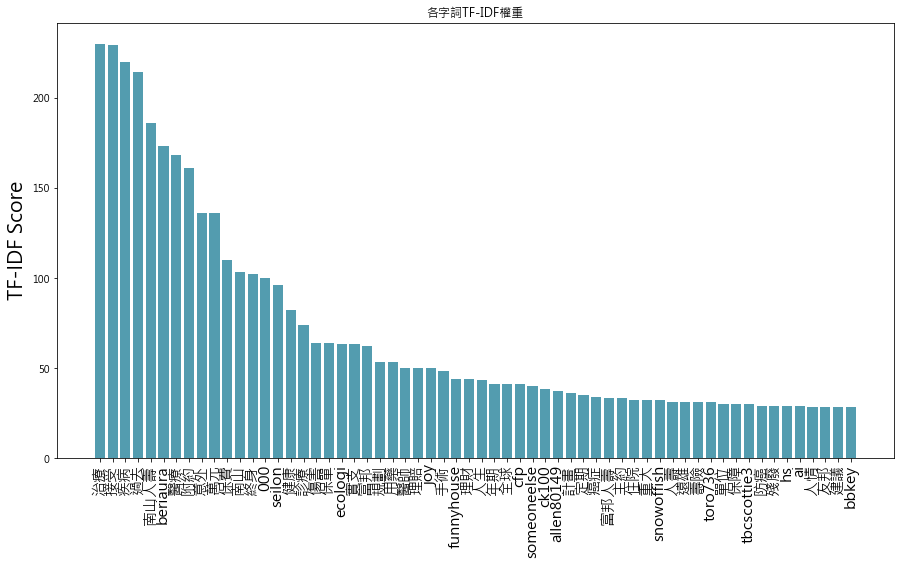

In [40]:
TFIDFlist = []
bbiglist = []
for TF in TFlist:
    TT = sorted(TF, key=lambda x: x[1],reverse = True)
    TFIDFlist.append([i[0] for i in TT[:35]])
    bbiglist.extend([i[0] for i in TT[:35]])
print((TFIDFlist[0]))
d = dict(Counter(bbiglist).most_common(60))

def barplot(x_data, y_data, x_label="", y_label="", title=""):
    font = font_manager.FontProperties(fname='msjh.ttc',weight='bold',style='normal', size=16)
    plt.figure(figsize = (15,8))
    ax = plt.subplot(1,1,1)
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # to remove line between points
    ax.set_ylabel(y_label, fontproperties = font, fontsize = 20)
    ax.set_xlabel(x_label, fontproperties = font, fontsize = 20)
    ax.set_xticklabels(x_data,fontproperties = font, rotation = 90, fontsize = 15)
    ax.set_title(title)
    
barplot(d.keys(),d.values(), y_label = "TF-IDF Score", title = "各字詞TF-IDF權重")